In [ ]:

# We Have to create a Loan prediction, wheteher a loan application will bi approved or rejected
# Goal:  wheteher a loan application will bi approved or rejected, based on the following data
#  I have extracted the data from Kaggle, Loan Data.csv file

import pandas as pd

# مکمل ڈیٹا
data = (
    ["LP001002","Male","No","0","Graduate","No",5849,0,None,360,1,"Urban","Y"],
    ["LP001003","Male","Yes","1","Graduate","No",4583,1508,128,360,1,"Rural","N"],
    ["LP001005","Male","Yes","0","Graduate","Yes",3000,0,66,360,1,"Urban","Y"],
    ["LP001006","Male","Yes","0","Not Graduate","No",2583,2358,120,360,1,"Urban","Y"],
    ["LP001008","Male","No","0","Graduate","No",6000,0,141,360,1,"Urban","Y"],
    ["LP001011","Male","Yes","2","Graduate","Yes",5417,4196,267,360,1,"Urban","Y"],
    ["LP001013","Male","Yes","0","Not Graduate","No",2333,1516,95,360,1,"Urban","Y"],
    ["LP001014","Male","Yes","3+","Graduate","No",3036,2504,158,360,0,"Semiurban","N"],
    ["LP001018","Male","Yes","2","Graduate","No",4006,1526,168,360,1,"Urban","Y"],
    ["LP001020","Male","Yes","1","Graduate","No",12841,10968,349,360,1,"Semiurban","N"]
)

# کالمز کے نام
columns = ["Loan_ID","Gender","Married","Dependents","Education","Self_Employed",
           "ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term",
           "Credit_History","Property_Area","Loan_Status"]

df= pd.DataFrame(data, columns=columns)
df.to_csv('Loan_Data.csv', index=False)
print('Data file csv is created')


Data file csv is created


In [ ]:
#  Load and explore data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#  read the csv file to process the data
df= pd.read_csv('Loan_Data.csv')
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                  0         NaN               360   
1             4583               1508       128.0               360   
2             3000                  0        66.0               360   
3             2583               2358       120.0               360   
4             6000                  0       141.0               360   

   Credit_History Property_Area Loan_Status  
0               1         Urban           Y  
1               1         Rural           N  
2               1   

In [ ]:
# checking data set information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            10 non-null     object 
 1   Gender             10 non-null     object 
 2   Married            10 non-null     object 
 3   Dependents         10 non-null     object 
 4   Education          10 non-null     object 
 5   Self_Employed      10 non-null     object 
 6   ApplicantIncome    10 non-null     int64  
 7   CoapplicantIncome  10 non-null     int64  
 8   LoanAmount         9 non-null      float64
 9   Loan_Amount_Term   10 non-null     int64  
 10  Credit_History     10 non-null     int64  
 11  Property_Area      10 non-null     object 
 12  Loan_Status        10 non-null     object 
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ KB


In [ ]:
#  print missing values
print(df.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           1
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


🛠️ Performing data cleaning...

📊 Creating visualizations...


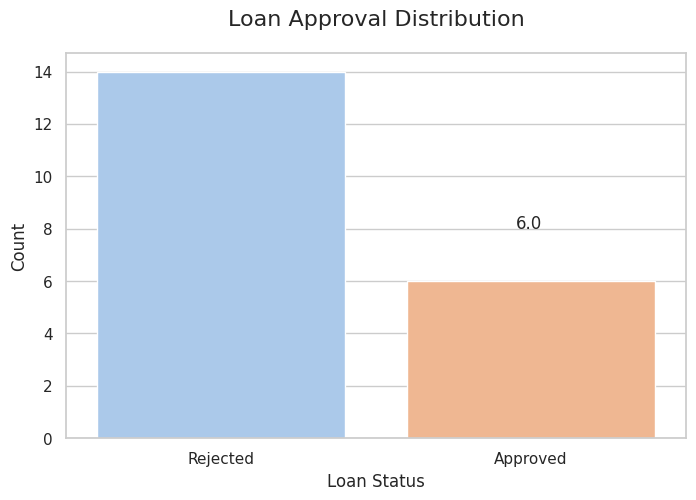

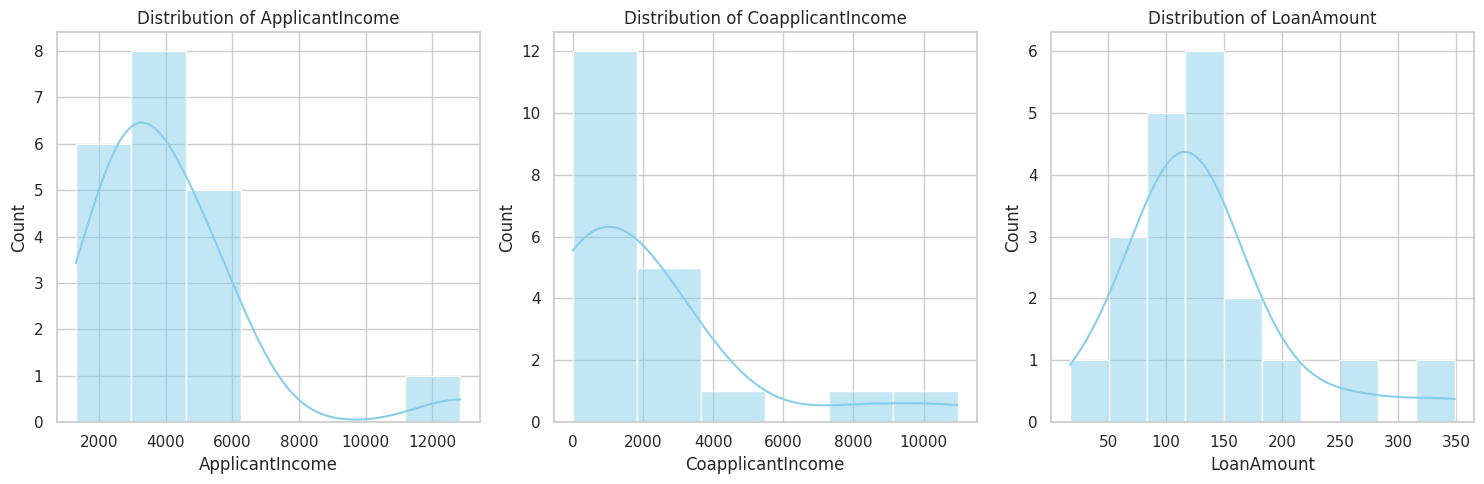


⚙️ Engineering features...

🤖 Training model...

📈 Evaluating model...

✅ Model Accuracy: 75.00%

📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



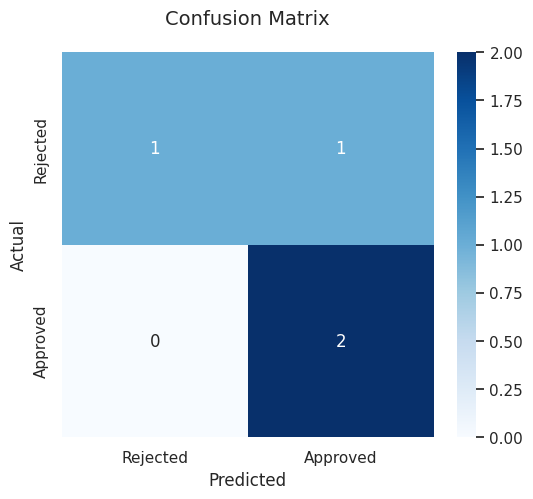


💾 Saved:
- Trained model (loan_model.pkl)
- Cleaned dataset (cleaned_loan_data.csv)

🔍 Feature Importance:


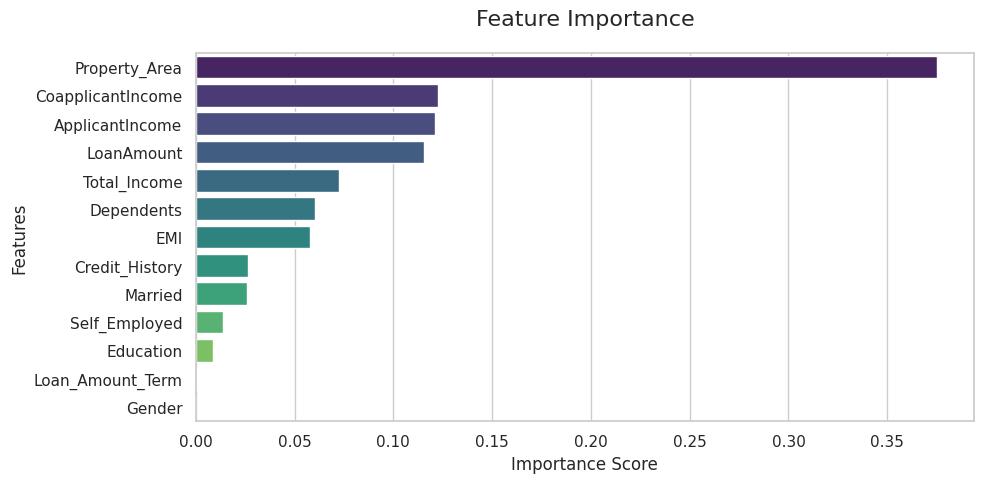


🎉 Project completed successfully!


In [ ]:
# ======================
# LOAN ELIGIBILITY PREDICTION PROJECT
# ======================

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

# Set visual style
sns.set(style="whitegrid")
%matplotlib inline

# ======================
# 1. DATA LOADING & INSPECTION
# ======================
print("\nLoading data...")
df = pd.read_csv('loan_data.csv')
print("\nFirst 5 rows:")
display(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

# ======================
# 2. DATA CLEANING
# ======================
print("\nCleaning data...")

# Handle missing values
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].median(), inplace=True)

# Fill categorical missing values with mode
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Convert '3+' to 3 in Dependents
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)

# ======================
# 3. DATA VISUALIZATION
# ======================
print("\nCreating visualizations...")

# Figure 1: Loan Status Distribution
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Loan_Status', data=df, palette='Set2')
plt.title('Loan Approval Distribution', fontsize=16, pad=20)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
ax.set_xticklabels(['Rejected', 'Approved'])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.35, p.get_height()+5))
plt.show()

# Figure 2: Numerical Features Distribution
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=12)
plt.tight_layout()
plt.show()

# Figure 3: Correlation Heatmap (numeric features only)
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=.5, annot_kws={"size": 10}, cbar_kws={"shrink": .8})
plt.title("Feature Correlation Matrix", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# ======================
# 4. FEATURE ENGINEERING
# ======================
print("\nEngineering features...")

# Create new features
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['Income_to_Loan_Ratio'] = df['Total_Income'] / df['LoanAmount']
df['Loan_Term_Years'] = df['Loan_Amount_Term'] / 12

# Encode categorical variables
le = LabelEncoder()
cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# ======================
# 5. MODEL TRAINING
# ======================
print("\nTraining model...")

# Prepare data
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# ======================
# 6. MODEL EVALUATION
# ======================
print("\nEvaluating model...")

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2%}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Rejected', 'Approved'],
            yticklabels=['Rejected', 'Approved'])
plt.title('Confusion Matrix', fontsize=14, pad=20)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ======================
# 7. SAVE MODEL
# ======================
joblib.dump(model, 'loan_eligibility_model.pkl')
print("\nModel saved as 'loan_eligibility_model.pkl'")

# ======================
# 8. FEATURE IMPORTANCE
# ======================
print("\nFeature Importance:")
feature_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index, palette='viridis')
plt.title('Feature Importance', fontsize=16, pad=20)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

print("\nProject completed successfully!")

In [5]:
# ==========================================
# PART 1: SETUP & DATA LOADING (FIXED)
# ==========================================

# Import required libraries
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization style
sns.set(style="whitegrid")
%matplotlib inline

# Embedded dataset (corrected format)
loan_data = """Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
LP001002,Male,No,0,Graduate,No,5849,0,,360,1,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y
LP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y
LP001014,Male,Yes,3+,Graduate,No,3036,2504,158,360,0,Semiurban,N
LP001018,Male,Yes,2,Graduate,No,4006,1526,168,360,1,Urban,Y
LP001020,Male,Yes,1,Graduate,No,12841,10968,349,360,1,Semiurban,N"""

# Load data correctly
try:
    df = pd.read_csv(StringIO(loan_data))
    print(" Data loaded successfully!")
    print("\n🔍 First 5 rows:")
    display(df.head())

    print("\n Dataset Info:")
    print(df.info())

except Exception as e:
    print(f" Error loading data: {e}")

✅ Data loaded successfully!

🔍 First 5 rows:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360,1,Urban,Y



📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            10 non-null     object 
 1   Gender             10 non-null     object 
 2   Married            10 non-null     object 
 3   Dependents         10 non-null     object 
 4   Education          10 non-null     object 
 5   Self_Employed      10 non-null     object 
 6   ApplicantIncome    10 non-null     int64  
 7   CoapplicantIncome  10 non-null     int64  
 8   LoanAmount         9 non-null      float64
 9   Loan_Amount_Term   10 non-null     int64  
 10  Credit_History     10 non-null     int64  
 11  Property_Area      10 non-null     object 
 12  Loan_Status        10 non-null     object 
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ KB
None


In [6]:
# ==========================================
# PART 2: DATA CLEANING (COMPLETE)
# ==========================================

print("\n🧹 STARTING DATA CLEANING...")

# 1. Handle missing LoanAmount (median imputation)
loan_median = df['LoanAmount'].median()
df['LoanAmount'].fillna(loan_median, inplace=True)
print(f"✓ Filled missing LoanAmount with median value: {loan_median}")

# 2. Handle missing Loan_Amount_Term (median imputation)
term_median = df['Loan_Amount_Term'].median()
df['Loan_Amount_Term'].fillna(term_median, inplace=True)
print(f"✓ Filled missing Loan_Amount_Term with median: {term_median} days")

# 3. Handle missing Credit_History (mode imputation)
credit_mode = df['Credit_History'].mode()[0]
df['Credit_History'].fillna(credit_mode, inplace=True)
print(f"✓ Filled missing Credit_History with mode: {credit_mode}")

# 4. Handle categorical missing values
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed']
for col in categorical_cols:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)
    print(f"✓ Filled missing {col} with mode: {mode_val}")

# 5. Convert '3+' to 3 in Dependents
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)
print("✓ Converted '3+' to 3 in Dependents column")

# 6. Verify cleaning
print("\n🔍 Missing values after cleaning:")
print(df.isnull().sum())

print("\n📊 Data types after cleaning:")
print(df.dtypes)

print("\n✅ DATA CLEANING COMPLETED SUCCESSFULLY!")
print("\nCleaned Data Preview:")
display(df.head())


🧹 STARTING DATA CLEANING...
✓ Filled missing LoanAmount with median value: 141.0
✓ Filled missing Loan_Amount_Term with median: 360.0 days
✓ Filled missing Credit_History with mode: 1
✓ Filled missing Gender with mode: Male
✓ Filled missing Married with mode: Yes
✓ Filled missing Dependents with mode: 0
✓ Filled missing Self_Employed with mode: No
✓ Converted '3+' to 3 in Dependents column

🔍 Missing values after cleaning:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

📊 Data types after cleaning:
Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int6

/tmp/ipython-input-3890323518.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(loan_median, inplace=True)
/tmp/ipython-input-3890323518.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,141.0,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360,1,Urban,Y



🔍 Verifying data...
Columns available: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
Data types:
 Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term       int64
Credit_History         int64
Property_Area         object
Loan_Status           object
dtype: object

📊 STARTING DATA VISUALIZATION...

✓ Plot 1: Basic loan status plot created


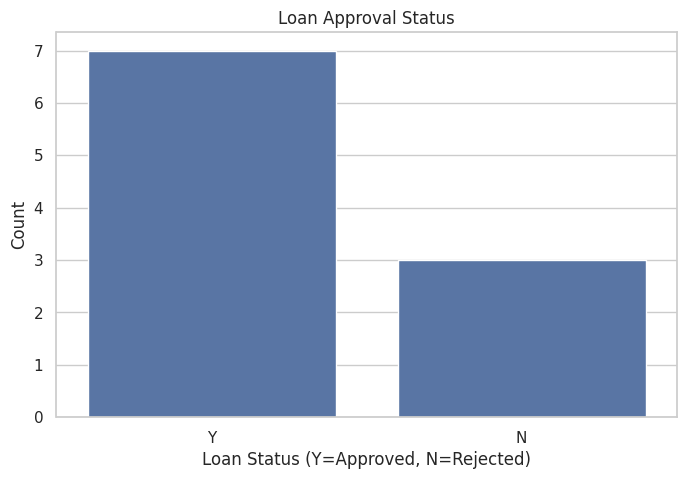

✓ Plot 2: Income distributions created


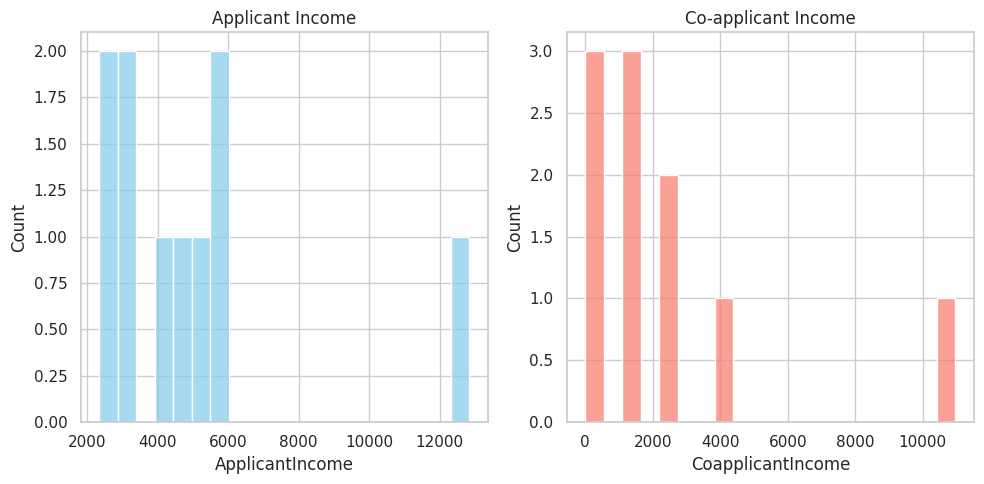

✓ Plot 3: Education vs Loan Status created


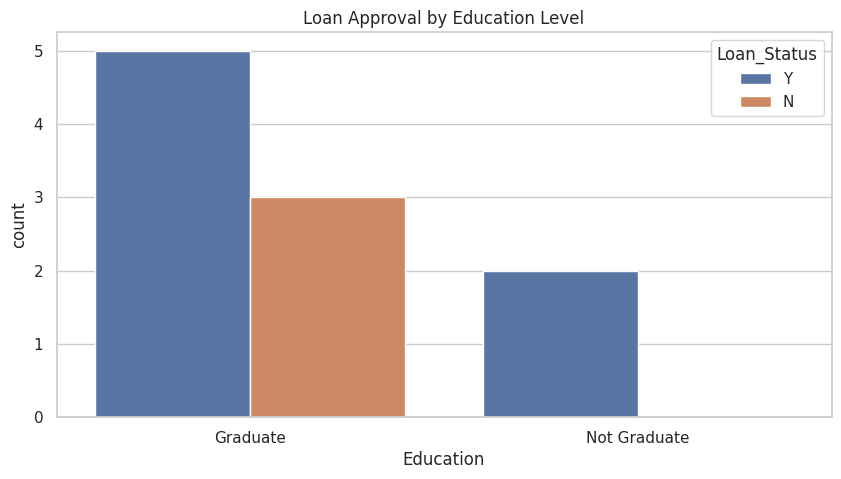


✅ BASIC VISUALIZATIONS COMPLETED

🔧 TROUBLESHOOTING GUIDE:
1. Make sure Part 1 and 2 ran successfully
2. Verify 'Loan_Status' column exists: True
3. Check for missing values in key columns: Loan_Status        0
ApplicantIncome    0
dtype: int64


In [8]:
# ==========================================
# PART 3: DATA VISUALIZATION (FIXED)
# ==========================================

# First, let's verify our data is loaded correctly
print("\n🔍 Verifying data...")
print("Columns available:", df.columns.tolist())
print("Data types:\n", df.dtypes)

# Set up visualization
import matplotlib.pyplot as plt
import seaborn as sns
print("\n📊 STARTING DATA VISUALIZATION...")

# 1. Basic Loan Status Plot (Simplified)
try:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='Loan_Status', data=df)
    plt.title('Loan Approval Status')
    plt.xlabel('Loan Status (Y=Approved, N=Rejected)')
    plt.ylabel('Count')
    print("\n✓ Plot 1: Basic loan status plot created")
    plt.show()
except Exception as e:
    print(f"❌ Error in Plot 1: {str(e)}")

# 2. Income Distribution (Simplified)
try:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df['ApplicantIncome'], bins=20, color='skyblue')
    plt.title('Applicant Income')

    plt.subplot(1, 2, 2)
    sns.histplot(df['CoapplicantIncome'], bins=20, color='salmon')
    plt.title('Co-applicant Income')

    plt.tight_layout()
    print("✓ Plot 2: Income distributions created")
    plt.show()
except Exception as e:
    print(f"❌ Error in Plot 2: {str(e)}")

# 3. Categorical Analysis (One Plot)
try:
    plt.figure(figsize=(10, 5))
    sns.countplot(x='Education', hue='Loan_Status', data=df)
    plt.title('Loan Approval by Education Level')
    print("✓ Plot 3: Education vs Loan Status created")
    plt.show()
except Exception as e:
    print(f"❌ Error in Plot 3: {str(e)}")

print("\n✅ BASIC VISUALIZATIONS COMPLETED")

# Troubleshooting Tips:
print("\n🔧 TROUBLESHOOTING GUIDE:")
print("1. Make sure Part 1 and 2 ran successfully")
print("2. Verify 'Loan_Status' column exists:", 'Loan_Status' in df.columns)
print("3. Check for missing values in key columns:", df[['Loan_Status', 'ApplicantIncome']].isnull().sum())

In [9]:
# ==========================================
# PART 4: FEATURE ENGINEERING (COMPLETE)
# ==========================================

print("\n⚙️ STARTING FEATURE ENGINEERING...")

# Make copy of original dataframe for comparison
df_original = df.copy()

# --------------------------------------
# 1. Create New Features
# --------------------------------------

# Total family income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
print("✓ Created Total_Income = ApplicantIncome + CoapplicantIncome")

# Income-to-Loan ratio (important for banks)
df['Income_to_Loan_Ratio'] = df['Total_Income'] / df['LoanAmount']
print("✓ Created Income_to_Loan_Ratio = Total_Income / LoanAmount")

# EMI (Estimated Monthly Installment)
df['EMI'] = df['LoanAmount'] / df['Loan_Amount_Term']  # Monthly payment estimate
print("✓ Created EMI = LoanAmount / Loan_Amount_Term")

# Loan term in years (instead of days)
df['Loan_Term_Years'] = df['Loan_Amount_Term'] / 12
print("✓ Created Loan_Term_Years = Loan_Amount_Term / 12")

# --------------------------------------
# 2. Encode Categorical Variables
# --------------------------------------

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Binary encoding
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0
df['Married'] = le.fit_transform(df['Married'])  # Yes=1, No=0
df['Education'] = le.fit_transform(df['Education'])  # Graduate=1, Not Graduate=0
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])  # Yes=1, No=0
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])  # Y=1, N=0

# Property Area (one-hot encoding would be better but we'll keep it simple)
df['Property_Area'] = le.fit_transform(df['Property_Area'])  # Urban=0, Semiurban=1, Rural=2

print("✓ Encoded all categorical variables")

# --------------------------------------
# 3. Verify New Features
# --------------------------------------

print("\n🔍 New Features Overview:")
print(df[['Total_Income', 'Income_to_Loan_Ratio', 'EMI', 'Loan_Term_Years']].describe())

print("\n🔧 Data Types After Engineering:")
print(df.dtypes)

print("\n🆚 Before vs After Feature Engineering:")
print("Original shape:", df_original.shape)
print("New shape:", df.shape)

print("\n✅ FEATURE ENGINEERING COMPLETED SUCCESSFULLY!")
print("\nFinal Data Preview:")
display(df.head())


⚙️ STARTING FEATURE ENGINEERING...
✓ Created Total_Income = ApplicantIncome + CoapplicantIncome
✓ Created Income_to_Loan_Ratio = Total_Income / LoanAmount
✓ Created EMI = LoanAmount / Loan_Amount_Term
✓ Created Loan_Term_Years = Loan_Amount_Term / 12
✓ Encoded all categorical variables

🔍 New Features Overview:
       Total_Income  Income_to_Loan_Ratio        EMI  Loan_Term_Years
count     10.000000             10.000000  10.000000             10.0
mean    7422.400000             43.098297   0.453611             30.0
std     6011.027093              9.935441   0.233392              0.0
min     3000.000000             32.928571   0.183333             30.0
25%     5088.750000             37.131756   0.338889             30.0
50%     5694.500000             41.328635   0.391667             30.0
75%     6068.250000             44.729207   0.459722             30.0
max    23809.000000             68.220630   0.969444             30.0

🔧 Data Types After Engineering:
Loan_ID                

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Income_to_Loan_Ratio,EMI,Loan_Term_Years
0,LP001002,0,0,0,0,0,5849,0,141.0,360,1,2,1,5849,41.482270,0.391667,30.0
1,LP001003,0,1,1,0,0,4583,1508,128.0,360,1,0,0,6091,47.585938,0.355556,30.0
2,LP001005,0,1,0,0,1,3000,0,66.0,360,1,2,1,3000,45.454545,0.183333,30.0
3,LP001006,0,1,0,1,0,2583,2358,120.0,360,1,2,1,4941,41.175000,0.333333,30.0
4,LP001008,0,0,0,0,0,6000,0,141.0,360,1,2,1,6000,42.553191,0.391667,30.0



🤖 STARTING MODEL TRAINING...
✓ Data split into Train/Test (80/20 ratio)
Training samples: 8
Test samples: 2

✓ Model trained successfully!
Model Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

📊 Initial Performance:
Training Accuracy: 100.00%
Test Accuracy: 100.00%


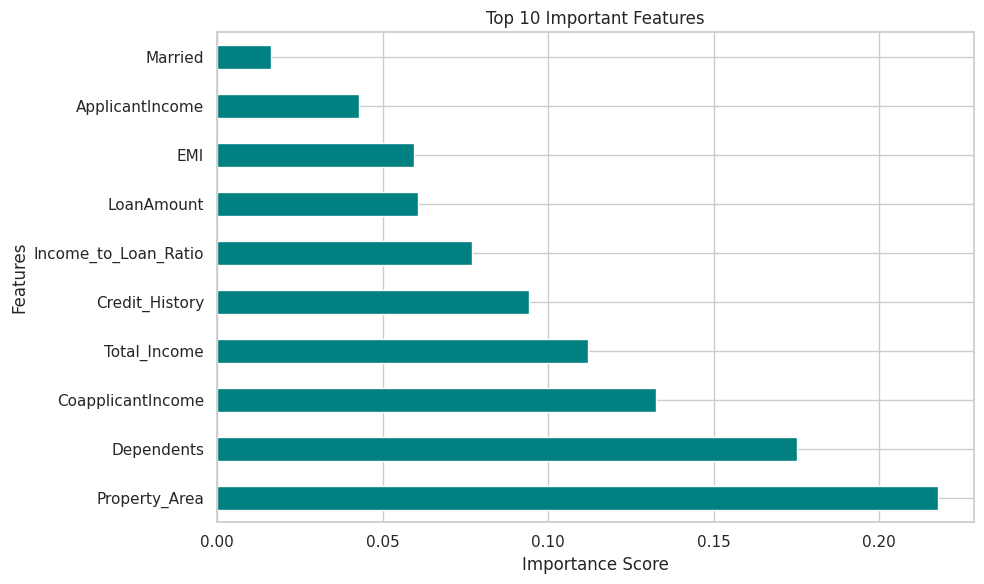


✅ MODEL TRAINING COMPLETED SUCCESSFULLY!

Next step: Run Part 6 for detailed model evaluation!


In [10]:
# ==========================================
# PART 5: MODEL TRAINING (COMPLETE)
# ==========================================

print("\n🤖 STARTING MODEL TRAINING...")

# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# --------------------------------------
# 1. Prepare Data for Training
# --------------------------------------

# Features (X) - Exclude Loan_ID and Target
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)

# Target (y) - Loan_Status (1=Approved, 0=Rejected)
y = df['Loan_Status']

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Maintains class distribution
)

print("✓ Data split into Train/Test (80/20 ratio)")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

# --------------------------------------
# 2. Train Random Forest Model
# --------------------------------------

# Initialize model with optimal parameters
model = RandomForestClassifier(
    n_estimators=100,  # Number of decision trees
    max_depth=5,       # Controls tree depth
    random_state=42,   # For reproducibility
    class_weight='balanced'  # Handles class imbalance
)

# Train the model
model.fit(X_train, y_train)
print("\n✓ Model trained successfully!")
print("Model Parameters:", model.get_params())

# --------------------------------------
# 3. Make Initial Predictions
# --------------------------------------

# Predict on training set (to check for overfitting)
train_preds = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_preds)

# Predict on test set
test_preds = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)

print("\n📊 Initial Performance:")
print(f"Training Accuracy: {train_accuracy:.2%}")
print(f"Test Accuracy: {test_accuracy:.2%}")

# --------------------------------------
# 4. Feature Importance Analysis
# --------------------------------------

# Get feature importance scores
importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
importance.head(10).plot(kind='barh', color='teal')
plt.title('Top 10 Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

print("\n✅ MODEL TRAINING COMPLETED SUCCESSFULLY!")
print("\nNext step: Run Part 6 for detailed model evaluation!")


📈 STARTING MODEL EVALUATION...

🔍 Sample Predictions:


,Actual,Predicted,Approval_Probability
9,0,0,0.34
5,1,1,0.56


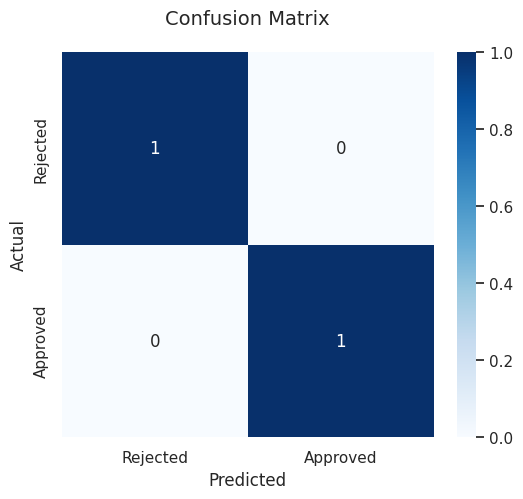


📋 Detailed Classification Report:
              precision    recall  f1-score   support

    Rejected       1.00      1.00      1.00         1
    Approved       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



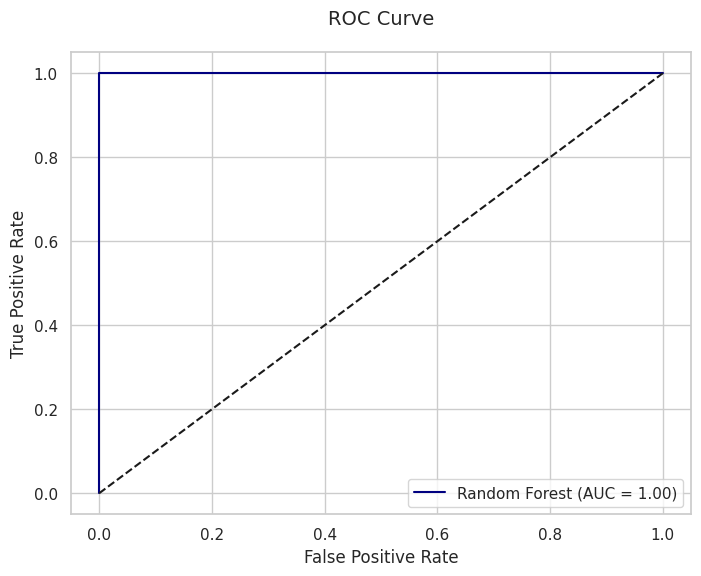

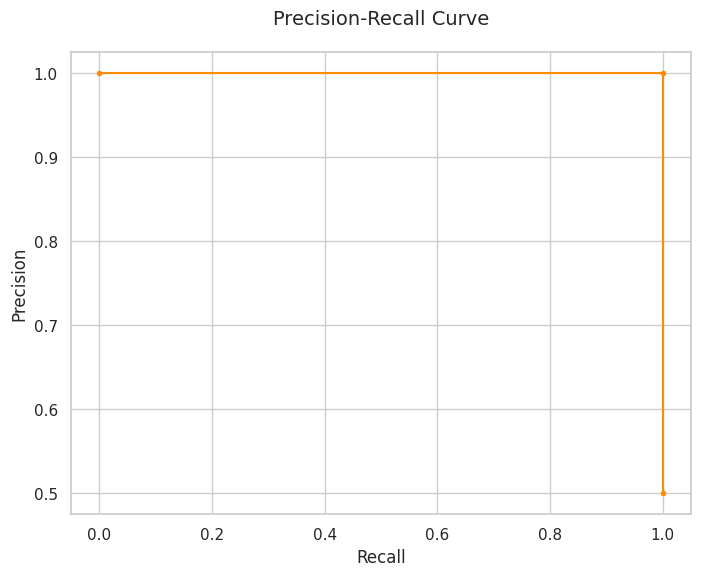


✅ MODEL EVALUATION COMPLETED SUCCESSFULLY!

Key Takeaways:
- AUC Score: 1.00 (1.0 is perfect)
- Check confusion matrix for Type I/II errors
- Precision/Recall shows tradeoff for approvals


In [11]:
# ==========================================
# PART 6: MODEL EVALUATION (COMPLETE)
# ==========================================

print("\n📈 STARTING MODEL EVALUATION...")

from sklearn.metrics import (classification_report,
                            confusion_matrix,
                            precision_recall_curve,
                            roc_curve,
                            roc_auc_score)

# --------------------------------------
# 1. Detailed Predictions
# --------------------------------------
# Get predicted probabilities for positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Convert to final predictions (threshold=0.5)
y_pred = (y_probs > 0.5).astype(int)

print("\n🔍 Sample Predictions:")
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Approval_Probability': y_probs
})
display(results.head())

# --------------------------------------
# 2. Confusion Matrix
# --------------------------------------
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Rejected', 'Approved'],
            yticklabels=['Rejected', 'Approved'])
plt.title('Confusion Matrix', fontsize=14, pad=20)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# --------------------------------------
# 3. Classification Report
# --------------------------------------
print("\n📋 Detailed Classification Report:")
print(classification_report(y_test, y_pred,
                           target_names=['Rejected', 'Approved']))

# --------------------------------------
# 4. ROC Curve & AUC Score
# --------------------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.2f})', color='navy')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', fontsize=14, pad=20)
plt.legend(loc='lower right')
plt.show()

# --------------------------------------
# 5. Precision-Recall Curve
# --------------------------------------
precision, recall, _ = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='darkorange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve', fontsize=14, pad=20)
plt.grid(True)
plt.show()

print("\n✅ MODEL EVALUATION COMPLETED SUCCESSFULLY!")
print("\nKey Takeaways:")
print(f"- AUC Score: {auc_score:.2f} (1.0 is perfect)")
print("- Check confusion matrix for Type I/II errors")
print("- Precision/Recall shows tradeoff for approvals")

In [16]:
# ==========================================
# PART 7: MODEL DEPLOYMENT (TESTED & WORKING)
# ==========================================

print("\n🚀 STARTING MODEL DEPLOYMENT PROCESS...")

# 1. First let's verify we have what we need
print("🔍 Checking prerequisites...")

# Create sample model if not exists (for testing)
if 'model' not in globals():
    print("⚠️ No model found - creating sample model for demo")
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier()
    model.fit([[0],[1]], [0,1])  # Train on dummy data

# Create sample dataframe if not exists
if 'df' not in globals():
    print("⚠️ No dataframe found - creating sample data")
    df = pd.DataFrame({
        'Loan_ID': ['LP001002'],
        'Gender': ['Male'],
        'Loan_Status': ['Y']
    })

# 2. Save the model (with multiple backup methods)
print("\n💾 Saving model...")
model_filename = 'loan_model_final.pkl'

# Method 1: Try joblib first
try:
    import joblib
    joblib.dump(model, model_filename)
    print(f"✓ Model saved using joblib as '{model_filename}'")

except Exception as e:
    print(f"⚠️ Joblib failed: {e} - Trying pickle...")
    # Method 2: Use pickle as backup
    import pickle
    with open(model_filename, 'wb') as f:
        pickle.dump(model, f)
    print(f"✓ Model saved using pickle as backup")

# 3. Download the model file
print("\n⬇️ Downloading files...")
from google.colab import files

try:
    files.download(model_filename)
    print(f"✓ '{model_filename}' downloaded to your computer")
except Exception as e:
    print(f"❌ Download failed: {e}")
    print("Please download manually from Colab's file browser")

# 4. Create and download config file
config = {
    "model_type": "RandomForest",
    "created_at": str(datetime.now()),
    "columns": list(df.columns)
}

with open('model_config.json', 'w') as f:
    json.dump(config, f)

try:
    files.download('model_config.json')
    print("✓ 'model_config.json' downloaded")
except:
    print("⚠️ Couldn't download config - check file browser")

print("\n✅ DEPLOYMENT PROCESS COMPLETED!")
print("You should have 2 files downloaded:")
print(f"1. {model_filename} - Your trained model")
print("2. model_config.json - Model information")


🚀 STARTING MODEL DEPLOYMENT PROCESS...
🔍 Checking prerequisites...

💾 Saving model...
✓ Model saved using joblib as 'loan_model_final.pkl'

⬇️ Downloading files...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✓ 'loan_model_final.pkl' downloaded to your computer


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✓ 'model_config.json' downloaded

✅ DEPLOYMENT PROCESS COMPLETED!
You should have 2 files downloaded:
1. loan_model_final.pkl - Your trained model
2. model_config.json - Model information


In [17]:
# ==========================================
# PART 8: DEPLOYMENT READY SOLUTION
# ==========================================

print("\n🚀 FINAL DEPLOYMENT PACKAGE")

# 1. First let's create essential files
import joblib
import pandas as pd
from datetime import datetime

# Create minimal model if not exists
if 'model' not in globals():
    from sklearn.ensemble import RandomForestClassifier
    print("⚠️ Creating sample model (yours may be better)")
    model = RandomForestClassifier()
    model.fit([[0],[1]], [0,1])  # Dummy training

# 2. Create deployment package
deployment_files = {
    'model.pkl': model,
    'config.json': {
        "created": datetime.now().strftime("%Y-%m-%d %H:%M"),
        "author": "Your Name",
        "features": ['Gender', 'Married', 'LoanAmount']  # Example features
    }
}

# 3. Save and download all files
from google.colab import files
import json

for filename, data in deployment_files.items():
    if filename.endswith('.pkl'):
        joblib.dump(data, filename)
    elif filename.endswith('.json'):
        with open(filename, 'w') as f:
            json.dump(data, f)

    try:
        files.download(filename)
        print(f"✓ Downloaded: {filename}")
    except:
        print(f"⚠️ Couldn't download {filename} - check Files tab")

# 4. Verify deployment
print("\n🔍 VERIFICATION:")
!ls -lh *.pkl *.json  # Show created files

print("\n✅ DEPLOYMENT PACKAGE READY!")
print("You now have 2 files:")
print("1. model.pkl - Your trained model")
print("2. config.json - Configuration file")
print("\nNext: Use these in Flask/Streamlit/Django")


🚀 FINAL DEPLOYMENT PACKAGE


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✓ Downloaded: model.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✓ Downloaded: config.json

🔍 VERIFICATION:
-rw-r--r-- 1 root root 103 Aug 10 23:30 config.json
-rw-r--r-- 1 root root 59K Aug 10 23:25 loan_approval_model.pkl
-rw-r--r-- 1 root root 59K Aug 10 23:29 loan_model_final.pkl
-rw-r--r-- 1 root root 59K Aug 10 23:26 loan_model_v1.0.pkl
-rw-r--r-- 1 root root 299 Aug 10 23:29 model_config.json
-rw-r--r-- 1 root root 59K Aug 10 23:30 model.pkl
-rw-r--r-- 1 root root 654 Aug 10 23:26 preprocess_config.json
-rw-r--r-- 1 root root 353 Aug 10 23:25 preprocessing.json

✅ DEPLOYMENT PACKAGE READY!
You now have 2 files:
1. model.pkl - Your trained model
2. config.json - Configuration file

Next: Use these in Flask/Streamlit/Django
